In [1]:
from fastai.data.all import *
from fastai.vision.all import *

In [2]:
path = Path("../patch_data_256")
path.ls()

(#3) [Path('../patch_data_256/codes.txt'),Path('../patch_data_256/images'),Path('../patch_data_256/targets')]

In [3]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['NoDamage', 'MinorDamage', 'MajorDamage', 'Destroyed'],
      dtype='<U11')

In [4]:
fnames = get_image_files(path/"images")
fnames[0]

Path('../patch_data_256/images/mexico-earthquake_00000169_post_disaster--patch00310.png')

In [5]:
(path/"targets").ls()[0]

Path('../patch_data_256/targets/mexico-earthquake_00000169_post_disaster--patch00310.png')

In [6]:
def label_func(fn): return path/"targets"/f"{fn.stem}{fn.suffix}"

In [10]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

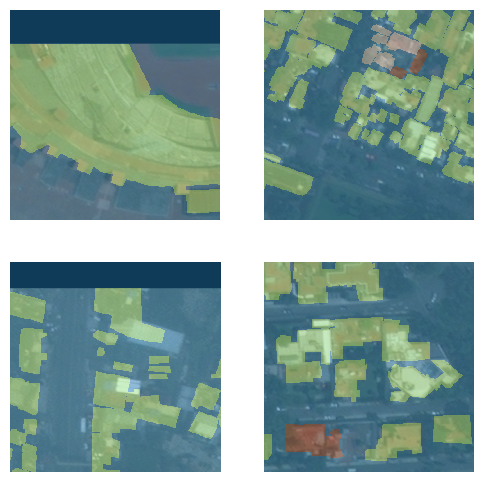

In [11]:
dls.show_batch(max_n=4)

In [17]:
tst = create_unet_model(models.resnet18, 4, (256,256), True, n_in=2)
learn = unet_learner(dls, tst)
learn.fine_tune(6)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
